## Preprocessing the Data

In [2]:
import pandas as pd
import numpy as np
from pandas import Series
import matplotlib.pylab as plt
#%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6


In [3]:
data = pd.read_csv('/home/prashant/Desktop/solardata.csv',skiprows = 2)

In [4]:
#Changing the columns name because of the space problems
col_names =data.columns
col_names = data.columns.str.replace(' ','_')
print(col_names)

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'DHI', 'DNI', 'GHI',
       'Clearsky_DHI', 'Clearsky_DNI', 'Clearsky_GHI', 'Dew_Point',
       'Temperature', 'Pressure', 'Relative_Humidity', 'Solar_Zenith_Angle',
       'Precipitable_Water', 'Snow_Depth', 'Wind_Direction', 'Wind_Speed',
       'Fill_Flag', 'Unnamed:_21', 'Unnamed:_22', 'Unnamed:_23', 'Unnamed:_24',
       'Unnamed:_25', 'Unnamed:_26', 'Unnamed:_27', 'Unnamed:_28',
       'Unnamed:_29', 'Unnamed:_30', 'Unnamed:_31', 'Unnamed:_32',
       'Unnamed:_33', 'Unnamed:_34'],
      dtype='object')


In [5]:
#Dropping the empty columms which are of no use

data.columns = col_names
drop_list = []

for col in col_names:
   
    if(data[col].isnull().sum() > data.shape[0]/2):
        drop_list.append(col)
        
data.drop(drop_list,axis =1,inplace =True)
data.head()       

,Year,Month,Day,Hour,Minute,DHI,DNI,GHI,Clearsky_DHI,Clearsky_DNI,...,Dew_Point,Temperature,Pressure,Relative_Humidity,Solar_Zenith_Angle,Precipitable_Water,Snow_Depth,Wind_Direction,Wind_Speed,Fill_Flag
0,2014,1,1,0,30,0,0,0,0,0,...,-4,11.470179,974.890503,31.764560,176.502940,1.148627,0,89.429634,3.827334,0
1,2014,1,1,1,30,0,0,0,0,0,...,-4,10.942517,974.722229,33.315156,166.155587,1.206034,0,88.038315,3.719974,0
2,2014,1,1,2,30,0,0,0,0,0,...,-4,10.462565,974.518005,34.873389,152.817241,1.253349,0,87.193565,3.481867,0
3,2014,1,1,3,30,0,0,0,0,0,...,-4,10.077782,974.263550,36.315791,139.419395,1.304086,0,87.497299,3.253181,0
4,2014,1,1,4,30,0,0,0,0,0,...,-4,9.786384,974.572876,37.494386,126.129768,1.370855,0,87.240990,3.103903,0


In [6]:
standard_area =5.7
efficiency = 0.20
data['Power_Produced'] = data['GHI'] * standard_area * efficiency
data.drop(['GHI','Snow_Depth'],axis =1,inplace= True)

In [7]:
#Creating the new variable with name as Date_Time and this will contian all the information regarding date,year,and time

data['Date_Time'] = data.Year.astype(str) + "/" + data.Month.astype(str) + "/" + data.Day.astype(str) + " " + data.Hour.astype(str)+ ":" + data.Minute.astype(str)    
data['Date_Time']=pd.to_datetime(data['Date_Time'])

#Printing year,month,day and time of first 6 rows
print(data.Date_Time.head())

0   2014-01-01 00:30:00
1   2014-01-01 01:30:00
2   2014-01-01 02:30:00
3   2014-01-01 03:30:00
4   2014-01-01 04:30:00
Name: Date_Time, dtype: datetime64[ns]


In [8]:
plt.plot(data.Date_Time.dt.hour,data.Power_Produced)
plt.title('Plot between Different hours of the day and Power Produced')
plt.xlabel('Hours')
plt.ylabel('Power Produced')



In [9]:
#Droping the column [Year,Month,Day,Hour,Minute] because there information is covered in columnn 'Date_Time'
data.drop(['Year','Month','Day','Hour','Minute'],axis =1,inplace=True)
data.drop('Fill_Flag',axis =1,inplace=True)


In [10]:
#Checking that is there any missing values is present or not in the data
print("The number of missing values in the column :-")
data.isnull().sum()

The number of missing values in the column :-


DHI                   0
DNI                   0
Clearsky_DHI          0
Clearsky_DNI          0
Clearsky_GHI          0
Dew_Point             0
Temperature           0
Pressure              0
Relative_Humidity     0
Solar_Zenith_Angle    0
Precipitable_Water    0
Wind_Direction        0
Wind_Speed            0
Power_Produced        0
Date_Time             0
dtype: int64

In [11]:
data['DHI'].isnull()
col_name = data.columns
data['Pressure'].values



array([ 974.89050293,  974.722229  ,  974.51800537, ...,  974.81854248,
        974.9520874 ,  974.72528076])

In [12]:
data.fillna(data.mean(),inplace = True)
print("All missing values are replaced by the mean of each feature")            

All missing values are replaced by the mean of each feature


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 15 columns):
DHI                   8760 non-null int64
DNI                   8760 non-null int64
Clearsky_DHI          8760 non-null int64
Clearsky_DNI          8760 non-null int64
Clearsky_GHI          8760 non-null int64
Dew_Point             8760 non-null int64
Temperature           8760 non-null float64
Pressure              8760 non-null float64
Relative_Humidity     8760 non-null float64
Solar_Zenith_Angle    8760 non-null float64
Precipitable_Water    8760 non-null float64
Wind_Direction        8760 non-null float64
Wind_Speed            8760 non-null float64
Power_Produced        8760 non-null float64
Date_Time             8760 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(6)
memory usage: 1.0 MB


In [14]:
#Create a new Dataframae
time = data.Date_Time.dt.time
ts = data.loc[: ,['Date_Time','Power_Produced']]
ts =ts.set_index('Date_Time')


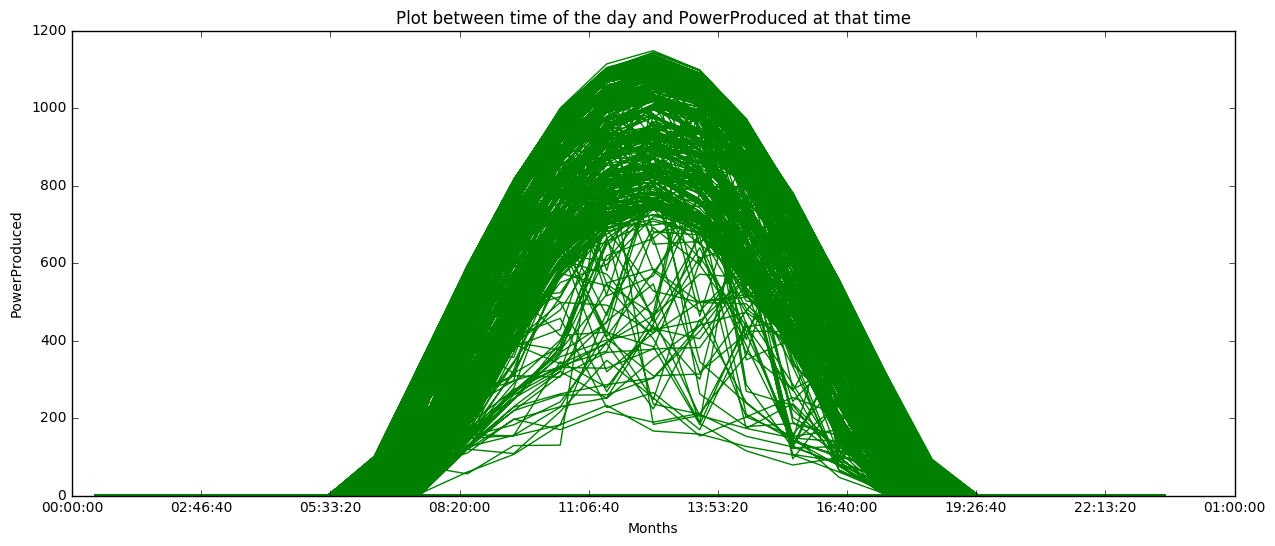

In [15]:
plt.plot(data.Date_Time.dt.time,data.Power_Produced)
plt.title('Plot between time of the day and PowerProduced at that time')
plt.xlabel('Months')
plt.ylabel('PowerProduced')
plt.show()

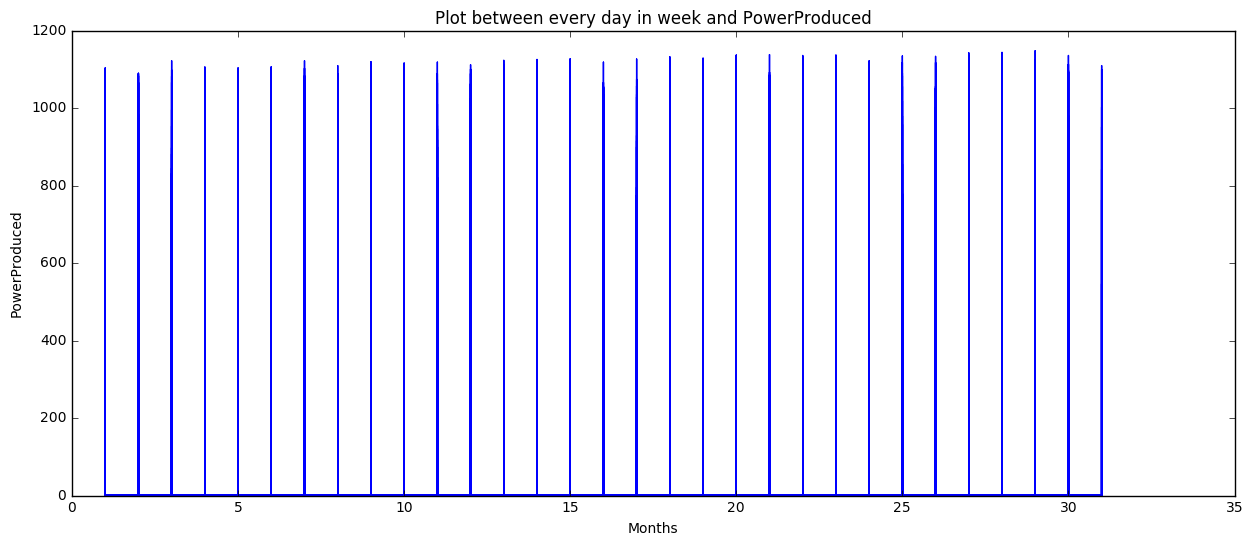

In [16]:
plt.plot(data.Date_Time.dt.day,data.Power_Produced)
plt.title('Plot between every day in week and PowerProduced')
plt.xlabel('Months')
plt.ylabel('PowerProduced')
plt.show()

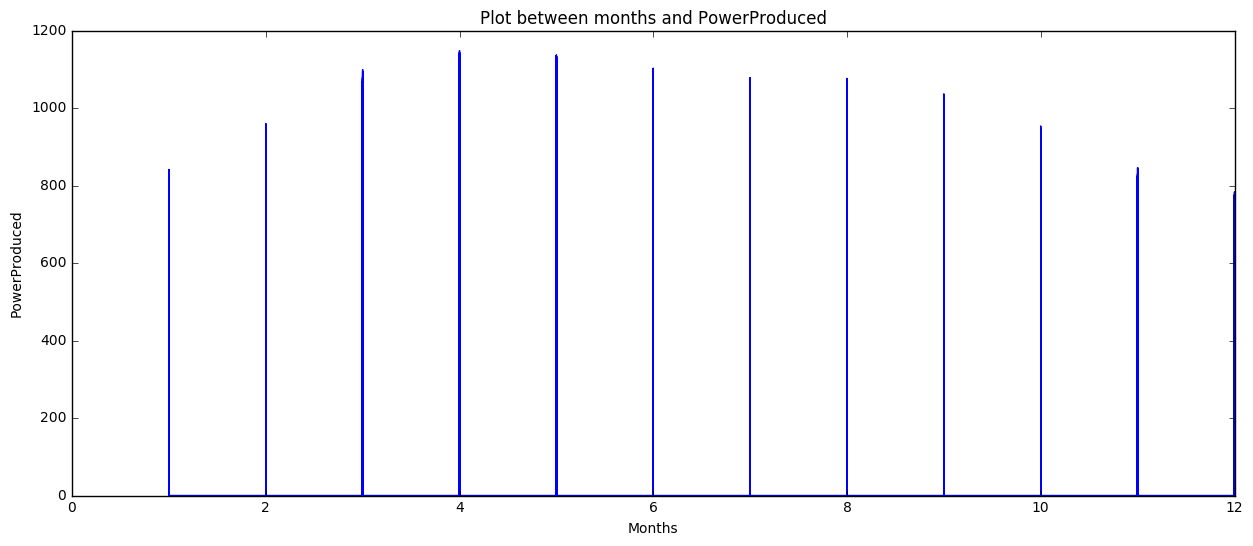

In [17]:
plt.plot(data.Date_Time.dt.month,data.Power_Produced)
plt.title('Plot between months and PowerProduced')
plt.xlabel('Months')
plt.ylabel('PowerProduced')
plt.show()

Corelation Matrix :


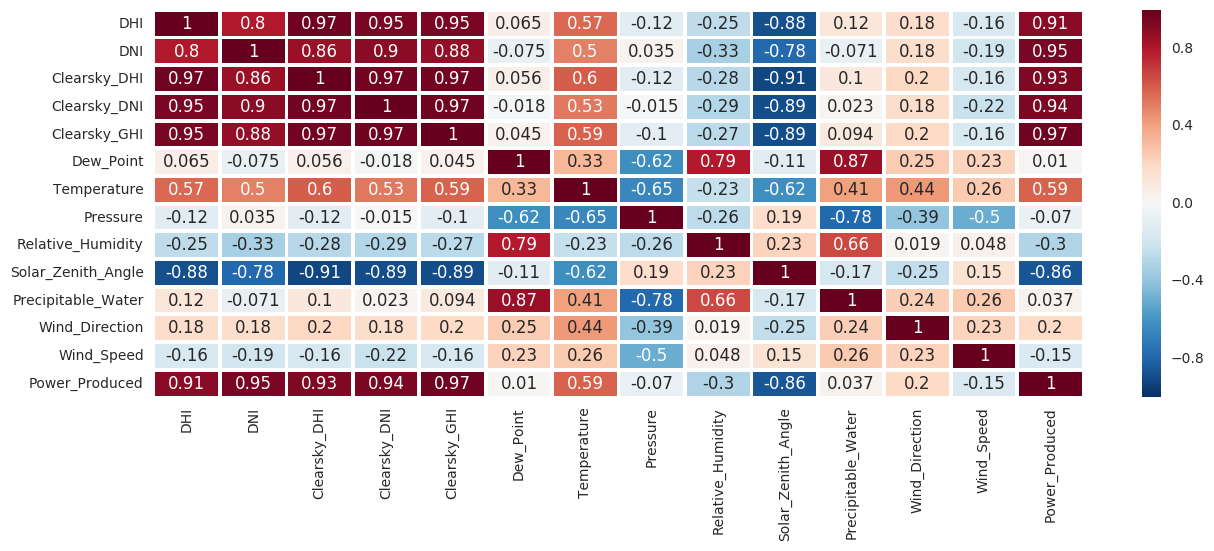

In [18]:
#print(data.head())
#plt.matshow(data.corr())
import matplotlib.pylab as plt1
import seaborn as sns
corr = data.corr()

fig, (axis1) = plt1.subplots(1,1,figsize=(15,5))
sns.heatmap(corr,annot =True ,linewidths=2,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
print("Corelation Matrix :")
plt1.show()

In [19]:

#Sepertating the target and response variables
X = data.loc[:,data.columns != 'Power_Produced']
X = X.loc [ : , X.columns != 'Clearsky_GHI']
X = X.loc[: ,X.columns != 'Date_Time']
X = X.drop(['DNI','DHI','Clearsky_DHI','Clearsky_DNI'],axis =1)
y = data.Power_Produced
y= pd.DataFrame(y)
y['Power_Produced'] =y


In [20]:
X.to_csv("X_modified.csv",index=False)
y.to_csv("y_modified.csv",index=False)